In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")




In [58]:
data=pd.read_csv("D:/kyphosis.csv")

display(data)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [59]:
data.head(10)




,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [60]:
data.tail(5)



,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [61]:
data.shape



(81, 4)

In [62]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [63]:
data.describe()




,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [64]:
data.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [65]:
x=data.drop("Kyphosis",axis=1)


y=data["Kyphosis"]

In [66]:
corr_mat=x.corr()
corr_mat


,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


<Axes: >

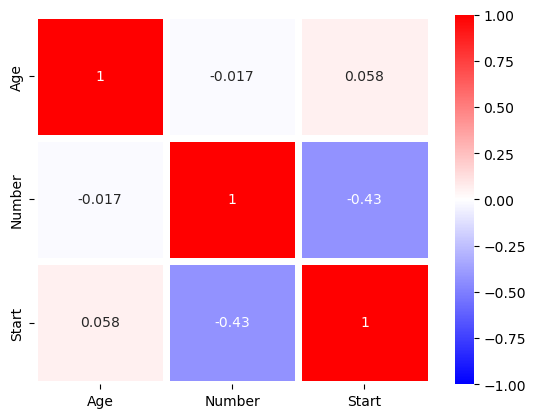

In [67]:
import seaborn as sns
sns.heatmap(corr_mat,vmax=1,vmin=-1,annot=True,linewidths=5,cmap='bwr')

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [69]:
x_train

,Age,Number,Start
61,114,7,8
55,72,5,15
40,73,5,1
9,59,6,12
64,118,4,16
...,...,...,...
20,22,2,16
60,130,4,1
71,127,4,12
14,168,3,18


In [70]:
y_train

61    present
55     absent
40    present
9     present
64     absent
       ...   
20     absent
60    present
71     absent
14     absent
51     absent
Name: Kyphosis, Length: 64, dtype: object

In [71]:

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(x_train,y_train)


DecisionTreeClassifier()

In [72]:
y_pred=model.predict(x_test)
y_pred

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present'], dtype=object)

In [73]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy



0.6470588235294118

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)



array([[10,  4],
       [ 2,  1]], dtype=int64)

In [75]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)



LogisticRegression()

In [76]:
y_pred=classifier.predict(x_test)
y_pred



array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)



array([[14,  0],
       [ 3,  0]], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



0.8235294117647058

In [79]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier



In [80]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)



RandomForestClassifier()

In [81]:
y_pred = rf.predict(x_test)
y_pred



array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [82]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8235294117647058
